In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
GRAPHS_FOLDER = 'Graphs/{}.png'

## Пункт 1

Загрузите данные из файла reglab1.txt. Постройте по набору данных регрессии, используя модели с различными зависимыми переменными. Выберите наиболее подходящую модель

In [3]:
data = pd.read_csv('reglab1.txt', sep='\t')
data.head()

,z,x,y
0,2.836772,0.271010,0.308331
1,4.987167,0.589598,0.514913
2,6.412325,0.651744,0.730453
3,4.641998,0.581983,0.461400
4,2.793941,0.463688,0.191102


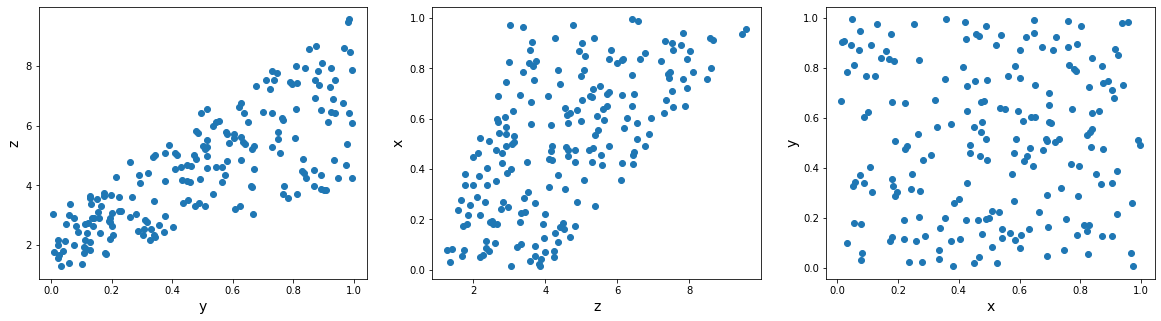

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes = np.ravel(axes)
for i, ax in enumerate(axes):
    x1 = data.iloc[:, i-1]
    x2 = data.iloc[:, i]
    ax.scatter(x1, x2)
    ax.set_xlabel(x1.name, fontsize=14)
    ax.set_ylabel(x2.name, fontsize=14)
plt.savefig(GRAPHS_FOLDER.format('Task 1. Variable dependencies'), bbox_inches='tight')
plt.show()

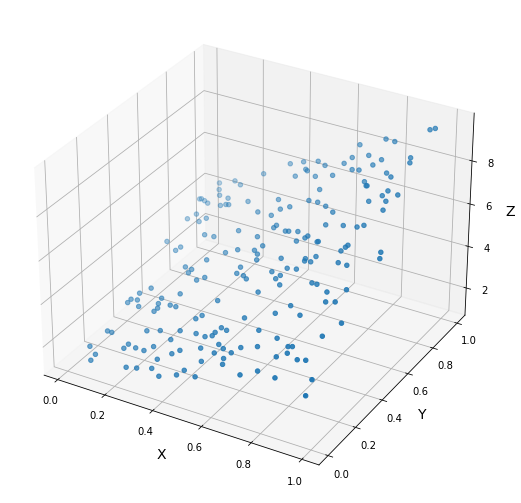

In [5]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:, 1], data.iloc[:, 2], data.iloc[:, 0])
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_zlabel('Z', fontsize=14)
plt.savefig(GRAPHS_FOLDER.format('Task 1. Data representation'), bbox_inches='tight')
plt.show()

In [6]:
for i in range(3):
    k = i % 3
    features = data.iloc[:, [i-1, i]]
    target = data.loc[:, data.columns.difference(features.columns)]
    model = LinearRegression().fit(features, target)
    
    print('Features:', *features.columns.values, '; target:', *target.columns.values)
    print('Coefficient of determination:', model.score(features, target))
    print()

Features: y z ; target: x
Coefficient of determination: 0.9186677284107213

Features: z x ; target: y
Coefficient of determination: 0.9505275437224913

Features: x y ; target: z
Coefficient of determination: 0.9686286787014154



## Пункт 2

Реализуйте следующий алгоритм для уменьшения количества признаков, используемых для построения регрессии: для каждого $k ∈ \{ 0, 1,..., d \}$  выбрать подмножество признаков мощности  $k^1$, минимизирующее остаточную сумму квадратов RSS. Используя полученный алгоритм, выберите оптимальное подмножество признаков для данных из файла reglab.txt. Объясните свой выбор.

In [7]:
data = pd.read_csv('reglab.txt', sep='\t')
data.head()

,y,x1,x2,x3,x4
0,3.469720,0.233628,0.835549,0.102965,0.457428
1,0.768448,0.117920,0.090544,0.258778,0.283951
2,2.880374,0.091520,0.797592,0.198528,0.699287
3,3.745485,0.876722,0.062935,0.615415,0.176058
4,1.853966,0.207406,0.303490,0.775967,0.667351


In [8]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [9]:
def get_RSS(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
    model = LinearRegression().fit(X_train, y_train)
    
    error = y_test.values - model.predict(X_test)
    return sum(error ** 2)

In [10]:
results = dict()

rss = get_RSS(X, y)
print('Features:', X.columns.values)
print('RSS:', rss)
print()
print('-----------------------------')
results[' '.join(X.columns.values)] = rss

columns_1 = X.columns.values
used_1 = []
for i, col_1 in enumerate(columns_1):
    features = X.loc[:, [col_1]]
    rss = get_RSS(features, y)
    print('Features:', features.columns.values)
    print('RSS:', rss)
    print()
    results[' '.join(features.columns.values)] = rss
    columns_2 = columns_1.copy()[i+1:]
    for j, col_2 in enumerate(columns_2):
        features = X.loc[:, [col_1, col_2]]
        rss = get_RSS(features, y)
        print('Features:', features.columns.values)
        print('RSS:', rss)
        print()
        results[' '.join(features.columns.values)] = rss
        columns_3 = columns_2.copy()[j+1:]
        
        for k, col_3 in enumerate(columns_3):
            features = X.loc[:, [col_1, col_2, col_3]]
            rss = get_RSS(features, y)
            print('Features:', features.columns.values)
            print('RSS:', rss)
            print()
            results[' '.join(features.columns.values)] = rss
            
            
    print('-----------------------------')

Features: ['x1' 'x2' 'x3' 'x4']
RSS: 0.030237165828972436

-----------------------------
Features: ['x1']
RSS: 26.351710789620846

Features: ['x1' 'x2']
RSS: 0.09502534958296872

Features: ['x1' 'x2' 'x3']
RSS: 0.05940616250424473

Features: ['x1' 'x2' 'x4']
RSS: 0.07048384467792673

Features: ['x1' 'x3']
RSS: 26.25871901013928

Features: ['x1' 'x3' 'x4']
RSS: 26.386861223728705

Features: ['x1' 'x4']
RSS: 26.581580131157374

-----------------------------
Features: ['x2']
RSS: 55.69640018591382

Features: ['x2' 'x3']
RSS: 55.48298673234403

Features: ['x2' 'x3' 'x4']
RSS: 55.29643806726985

Features: ['x2' 'x4']
RSS: 55.45246616803578

-----------------------------
Features: ['x3']
RSS: 69.50222793557936

Features: ['x3' 'x4']
RSS: 69.48935606997912

-----------------------------
Features: ['x4']
RSS: 69.86460517571608

-----------------------------


In [11]:
min_key = min(results, key=results.get)
print(min_key, results[min_key])

x1 x2 x3 x4 0.030237165828972436


## Пункт 3

Загрузите данные из файла cygage.txt. Постройте регрессию, выражающую зависимость возраста исследуемых отложений от глубины залегания, используя веса наблюдений. Оцените качество построенной модели.

In [12]:
data = pd.read_csv('cygage.txt', sep='\t')
data.head()

,calAge,Depth,Weight
0,0,0,1.0
1,3707,77,0.1
2,4150,90,0.1
3,5350,107,0.1
4,4500,168,0.1


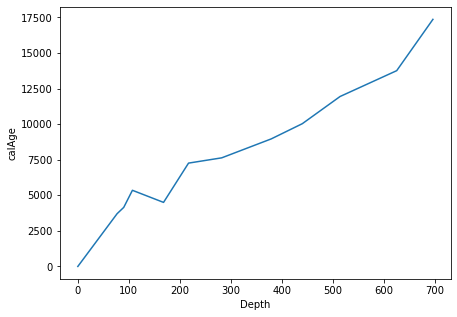

In [13]:
X = data['Depth']
y = data['calAge']
weights = data['Weight']

plt.figure(figsize=(7, 5))
plt.plot(X, y)
plt.ylabel('calAge')
plt.xlabel('Depth')
plt.savefig(GRAPHS_FOLDER.format('Task 3. Variable dependency'), bbox_inches='tight')
plt.show()

In [14]:
X = X.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y, sample_weight=weights)
print('Score:', model.score(X, y, sample_weight=weights))

Score: 0.9736839487233144


## Пункт 4

Загрузите данные из файла longley.csv. Данные состоят из 7 экономических переменных, наблюдаемых с 1947 по 1962 годы (n=16). Исключите переменную Population. Разделите данные на тестовую и обучающую выборки равных размеров случайным образом. Постройте линейную регрессию по признаку Employed.
Постройте гребневую регрессию для значений  $λ=10^{-3+0.2i}, i=0,...,25$. Подсчитайте ошибку на тестовой и обучающей выборке для линейной регрессии и гребневой регрессии на данных значениях $λ$, постройте графики. Объясните полученные результаты.


In [15]:
data = pd.read_csv('longley.csv')
data = data.drop('Population', axis=1)
data.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Year,Employed
0,83.0,234.289,235.6,159.0,1947,60.323
1,88.5,259.426,232.5,145.6,1948,61.122
2,88.2,258.054,368.2,161.6,1949,60.171
3,89.5,284.599,335.1,165.0,1950,61.187
4,96.2,328.975,209.9,309.9,1951,63.221


In [16]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=78)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Linear Regression')
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Linear Regression
Train score: 0.994277078345096
Test score: 0.8805107958823072


In [18]:
train_res = []
test_res = []
for i in range(26):
    model = Ridge(alpha=10**(-3+0.2*i))
    model.fit(X_train, y_train)
    train_res.append(model.score(X_train, y_train))
    test_res.append(model.score(X_test, y_test))

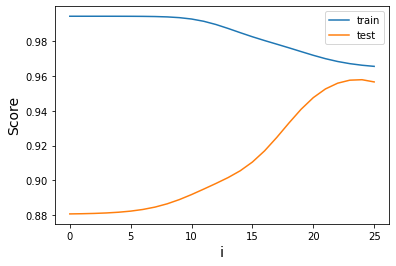

In [19]:
plt.plot(range(26), train_res, label='train')
plt.plot(range(26), test_res, label='test')
plt.xlabel('i', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend()
plt.savefig(GRAPHS_FOLDER.format('Task 4. Dependency between score and lambda'), bbox_inches='tight')
plt.show()

In [20]:
model = Ridge()
model.fit(X_train, y_train)
print('Linear Regression')
print('Train score:', model.score(X_train, y_train))
print('Test score:', model.score(X_test, y_test))

Linear Regression
Train score: 0.9824847343302906
Test score: 0.9105084109684187


## Пункт 5

Загрузите данные из файла eustock.csv. Данные содержат ежедневные котировки на момент закрытия фондовых бирж: Germany DAX (Ibis), Switzerland SMI, France CAC, и UK FTSE. Постройте на одном графике все кривые изменения котировок во времени. Постройте линейную регрессию для каждой модели в отдельности и для всех моделей вместе. Оцените, какая из бирж имеет наибольшую динамику.

In [21]:
data = pd.read_csv('eustock.csv')
data.head()

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2
3,1621.04,1684.1,1708.1,2470.4
4,1618.16,1686.6,1723.1,2484.7


DAX
Coefficient of determination: 0.733147983856772
Slope coef: [1.72943226]

SMI
Coefficient of determination: 0.7943667509046648
Slope coef: [2.75975579]

CAC
Coefficient of determination: 0.5302896122687919
Slope coef: [0.78682966]

FTSE
Coefficient of determination: 0.848172314237998
Slope coef: [1.67483145]



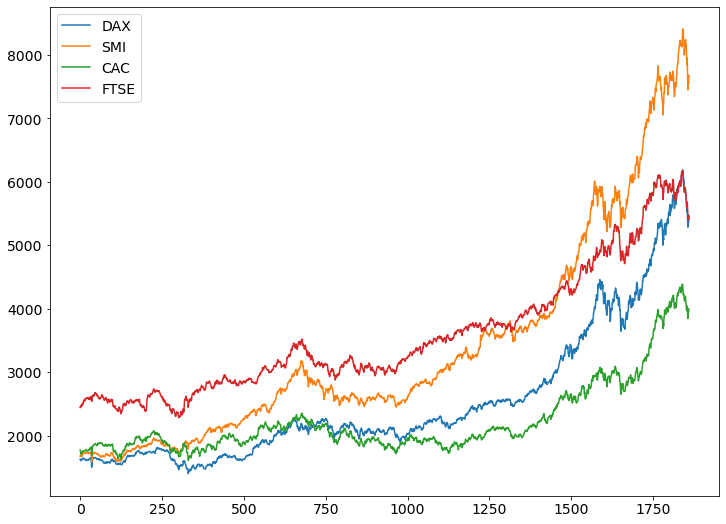

In [22]:
coefs = []
intercepts = []
X = np.arange(data.shape[0]).reshape(-1, 1)
plt.figure(figsize=(12, 9))
for col in data.columns.values:
    y = data[col]
    plt.plot(X, y, label=col)
    model = LinearRegression()
    model.fit(X, y)
    coefs.append(model.coef_)
    intercepts.append(model.intercept_)
    print(col)
    print('Coefficient of determination:', model.score(X, y))
    print('Slope coef:', model.coef_)
    print()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.savefig(GRAPHS_FOLDER.format('Task 5. Quotations'), bbox_inches='tight')
plt.show()

In [23]:
model = LinearRegression()
model.fit(X, data)
print('All')
print('Coefficient of determination:', model.score(X, data))
print('Slope coef:', model.coef_)

All
Coefficient of determination: 0.7264941653170567
Slope coef: [[1.72943226]
 [2.75975579]
 [0.78682966]
 [1.67483145]]


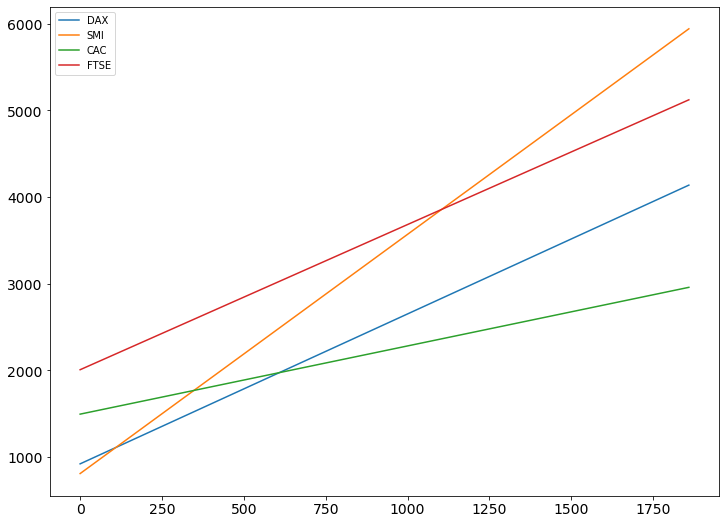

In [24]:
plt.figure(figsize=(12, 9))
for i, col in enumerate(data.columns.values):
    vals = coefs[i] * X + intercepts[i]
    plt.plot(X, vals, label=col)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.legend()
plt.savefig(GRAPHS_FOLDER.format('Task 5. Dynamics of quotations'), bbox_inches='tight')
plt.show()

## Пункт 6

Загрузите данные из файла JohnsonJohnson.csv. Данные содержат поквартальную прибыль компании Johnson & Johnson с 1960 по 1980 гг. Постройте на одном графике все кривые изменения прибыли во времени. Постройте линейную регрессию для каждого квартала в отдельности и для всех кварталов вместе. Оцените, в каком квартале компания имеет наибольшую и наименьшую динамику доходности. Сделайте прогноз по прибыли в 2016 году во всех кварталах и в среднем по году.

In [25]:
data = pd.read_csv('JohnsonJohnson.csv')
data.head()

,index,value
0,1960 Q1,0.71
1,1960 Q2,0.63
2,1960 Q3,0.85
3,1960 Q4,0.44
4,1961 Q1,0.61


In [26]:
data[['Year', 'Quater']] = data['index'].str.split(' ', 1, expand=True)
data = data.drop('index', axis=1)
data.head()

,value,Year,Quater
0,0.71,1960,Q1
1,0.63,1960,Q2
2,0.85,1960,Q3
3,0.44,1960,Q4
4,0.61,1961,Q1


In [27]:
data = data.pivot(index='Year', columns='Quater', values='value')
data = data.rename_axis([None], axis=1)
data.head()

,Q1,Q2,Q3,Q4
Year,,,,
1960,0.71,0.63,0.85,0.44
1961,0.61,0.69,0.92,0.55
1962,0.72,0.77,0.92,0.60
1963,0.83,0.80,1.00,0.77
1964,0.92,1.00,1.24,1.00


Q1
Coefficient of determination: 0.8364578863855381
Slope coef: [0.69496104]
Prediction: [36.75963636]
Q2
Coefficient of determination: 0.8915951120692949
Slope coef: [0.6852987]
Prediction: [36.48945455]
Q3
Coefficient of determination: 0.8652211730116429
Slope coef: [0.70435065]
Prediction: [37.65393939]
Q4
Coefficient of determination: 0.9282459224094107
Slope coef: [0.53490909]
Prediction: [28.79391342]


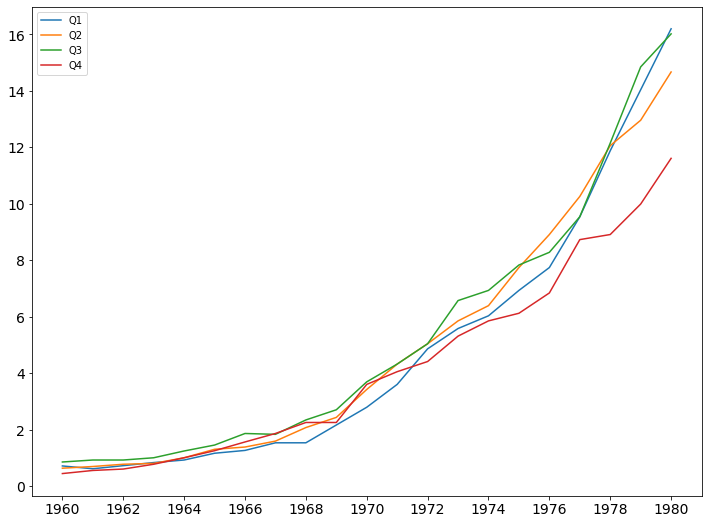

In [28]:
coefs = []
intercepts = []
X = np.arange(1960, 1981).reshape(-1, 1)
target_year = np.array([[2016]])
plt.figure(figsize=(12, 9))
for col in data.columns.values:
    y = data.loc[:, col]
    plt.plot(X, y, label=col)
    model = LinearRegression()
    model.fit(X, y)
    coefs.append(model.coef_)
    intercepts.append(model.intercept_)
    print(col)
    print('Coefficient of determination:', model.score(X, y))
    print('Slope coef:', model.coef_)
    print('Prediction:', model.predict(target_year))
plt.xticks(range(1960, 1981, 2), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.legend()
plt.savefig(GRAPHS_FOLDER.format('Task 6. Quarters'), bbox_inches='tight')
plt.show()

In [29]:
model = LinearRegression()
model.fit(X, data)
coefs.append(model.coef_)
intercepts.append(model.intercept_)
print('All')
print('Coefficient of determination:', model.score(X, data))
print('Slope coef:', model.coef_)
print('Prediction:', model.predict(target_year).mean())

All
Coefficient of determination: 0.8803800234689713
Slope coef: [[0.69496104]
 [0.6852987 ]
 [0.70435065]
 [0.53490909]]
Prediction: 34.924235930735904


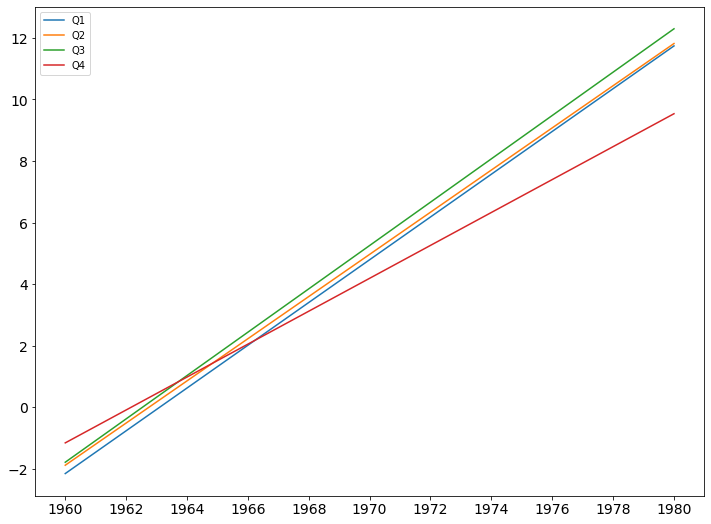

In [30]:
plt.figure(figsize=(12, 9))
for i, col in enumerate(data.columns.values):
    vals = coefs[i] * X + intercepts[i]
    plt.plot(X, vals, label=col)
plt.xticks(range(1960, 1981, 2), fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.legend()
plt.savefig(GRAPHS_FOLDER.format('Task 6. Dynamics of quarters'), bbox_inches='tight')
plt.show()

## Пункт 7

Загрузите данные из файла cars.csv. Данные содержат зависимости тормозного пути автомобиля (футы) от его скорости (мили в час). Данные получены в 1920 г. Постройте регрессионную модель и оцените длину тормозного пути при скорости 40 миль в час.

In [31]:
data = pd.read_csv('cars.csv')
data.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [32]:
X = data['speed'].values.reshape(-1, 1)
y = data['dist']

model = LinearRegression()
model.fit(X, y)
print('Coefficient of determination:', model.score(X, y))
print('Prediction:', model.predict([[40]]))

Coefficient of determination: 0.6510793807582509
Prediction: [139.71725547]


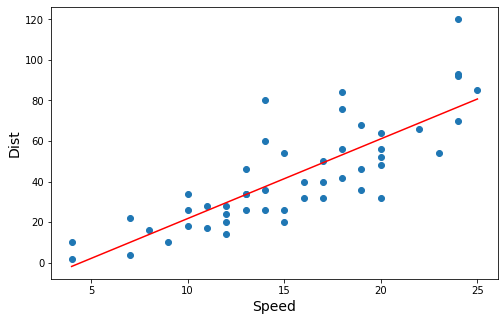

In [33]:
vals = model.coef_[0] * X + model.intercept_

plt.figure(figsize=(8, 5))
plt.plot(X, vals, c='r')
plt.xlabel('Speed', fontsize=14)
plt.ylabel('Dist', fontsize=14)
plt.scatter(X, y)
plt.savefig(GRAPHS_FOLDER.format('Task 7. Dependency between braking distance and speed'), bbox_inches='tight')
plt.show()

## Пункт 8

Загрузите данные из файла svmdata6.txt. Постройте регрессионный алгоритм метода опорных векторов (sklearn.svm.SVR) с параметром C = 1, используя ядро "rbf". Отобразите на графике зависимость среднеквадратичной ошибки на обучающей выборке от значения параметра ε. Прокомментируйте полученный результат

In [34]:
data = pd.read_csv('svmdata6.txt', sep='\t')
data.head()

,X,Y
1,0.00,-0.035662
2,0.05,0.059784
3,0.10,-0.111344
4,0.15,0.099728
5,0.20,0.297808


In [35]:
X = data['X'].values.reshape(-1, 1)
y = data['Y']

mse = []
for eps in np.arange(0, 1, 0.05):
    model = SVR(epsilon=eps)
    model.fit(X, y)
    mse.append(mean_squared_error(y, model.predict(X)))

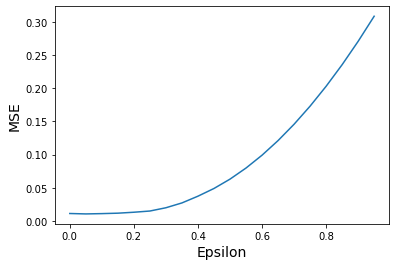

In [36]:
plt.plot(np.arange(0, 1, 0.05), mse)
plt.xlabel('Epsilon', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.savefig(GRAPHS_FOLDER.format('Task 8. Dependency between MSE and Epsilon'), bbox_inches='tight')
plt.show()

## Пункт 9

Загрузите набор данных из файла nsw74psid1.csv. Постройте регрессионное дерево (sklearn.tree.DecisionTreeRegressor) для признака re78. Постройте линейную регрессионную модель и SVM-регрессию для этого набора данных. Сравните качество построенных моделей, выберите оптимальную модель и объясните свой выбор. 

In [37]:
data = pd.read_csv('nsw74psid1.csv')
data.head()

,trt,age,educ,black,hisp,marr,nodeg,re74,re75,re78
0,0,47,12,0,0,0,0,0.0,0.0,0.0
1,0,50,12,1,0,1,0,0.0,0.0,0.0
2,0,44,12,0,0,0,0,0.0,0.0,0.0
3,0,28,12,1,0,1,0,0.0,0.0,0.0
4,0,54,12,0,0,1,0,0.0,0.0,0.0


In [38]:
X = data.loc[:, data.columns != 're78']
y = data.loc[:, 're78']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [39]:
models = (
    LinearRegression(),
    SVR(),
    SVR(kernel='poly', degree=2),
    DecisionTreeRegressor(),
    DecisionTreeRegressor(max_depth=4)
)

titles = (
    'Linear regression',
    'Default SVR',
    'SVR with poly kernel and degree=2',
    'Default Decision tree',
    'Decision tree with max_depth=4'
)

for model, title in zip(models, titles):
    model.fit(X_train, y_train)
    print(title)
    print('Train coefficient of determination:', model.score(X_train, y_train))
    print('Test coefficient of determination:', model.score(X_test, y_test))
    print('MSE:', mean_squared_error(y_test, model.predict(X_test)))
    print()

Linear regression
Train coefficient of determination: 0.5807331442245964
Test coefficient of determination: 0.6065627352621803
MSE: 96715423.73420334

Default SVR
Train coefficient of determination: 0.02157526425420675
Test coefficient of determination: 0.012802347710630158
MSE: 242674621.36359063

SVR with poly kernel and degree=2
Train coefficient of determination: 0.18129737697671444
Test coefficient of determination: 0.21064822327352228
MSE: 194039808.6396849

Default Decision tree
Train coefficient of determination: 0.9970483844252672
Test coefficient of determination: 0.2452177058388716
MSE: 185541879.09859806

Decision tree with max_depth=4
Train coefficient of determination: 0.593093120660894
Test coefficient of determination: 0.5165258419260557
MSE: 118848447.39813466

